In [63]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `Dataset`.

In [64]:
# Import train & test data 
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')


In [65]:
# View the training data
train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [66]:
train.loc[train['gift_id']=='GF_519']

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
12,GF_519,168,403,1846,2014-10-15 22:59:24.000,2017-04-03 15:40:33.000,3799,3358,1230,51,9,327,2017-03-31 12:40:33.000,2017-03-26 12:25:37.484,0,25.0,176.69


In [67]:
# View the training data columns
train.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'volumes', 'price'],
      dtype='object')

In [68]:
# View the training data shape
train.shape

(20279, 17)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20279 entries, 0 to 20278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_id            20279 non-null  object 
 1   gift_type          20279 non-null  int64  
 2   gift_category      20279 non-null  int64  
 3   gift_cluster       20279 non-null  int64  
 4   instock_date       20279 non-null  object 
 5   stock_update_date  20279 non-null  object 
 6   lsg_1              20279 non-null  int64  
 7   lsg_2              20279 non-null  int64  
 8   lsg_3              20279 non-null  int64  
 9   lsg_4              20279 non-null  int64  
 10  lsg_5              20279 non-null  int64  
 11  lsg_6              20279 non-null  int64  
 12  uk_date1           20279 non-null  object 
 13  uk_date2           20279 non-null  object 
 14  is_discounted      20279 non-null  int64  
 15  volumes            7323 non-null   float64
 16  price              202

In [70]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes
0,GF_2372,842,663,24,2016-11-12 13:49:12.000,2016-11-16 10:49:12.000,203,1334,4358,1912,10,1899,2016-11-16 12:49:12.000,2016-11-13 04:00:00.000,0,NaN
1,GF_13040,407,534,754,2016-11-12 13:49:22.000,2016-11-17 14:49:22.000,4785,5940,2582,1912,10,1488,2016-11-12 14:49:22.000,2016-11-03 01:00:00.000,0,NaN
2,GF_5754,631,433,6012,2016-11-12 13:49:23.000,2016-11-16 13:49:23.000,1812,5027,3427,1912,10,1913,2016-11-15 11:49:23.000,2016-11-01 05:00:00.000,1,NaN
3,GF_1417,992,433,6358,2016-11-12 13:49:24.000,2016-11-16 11:49:24.000,2002,6883,5537,1912,10,1734,2016-11-14 12:49:24.000,2016-11-04 04:00:00.000,0,NaN
4,GF_23204,43,534,6123,2016-11-12 13:49:40.000,2016-11-18 11:49:40.000,1512,6883,610,1912,9,150,2016-11-14 10:49:40.000,2016-11-02 01:00:00.000,1,NaN


## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

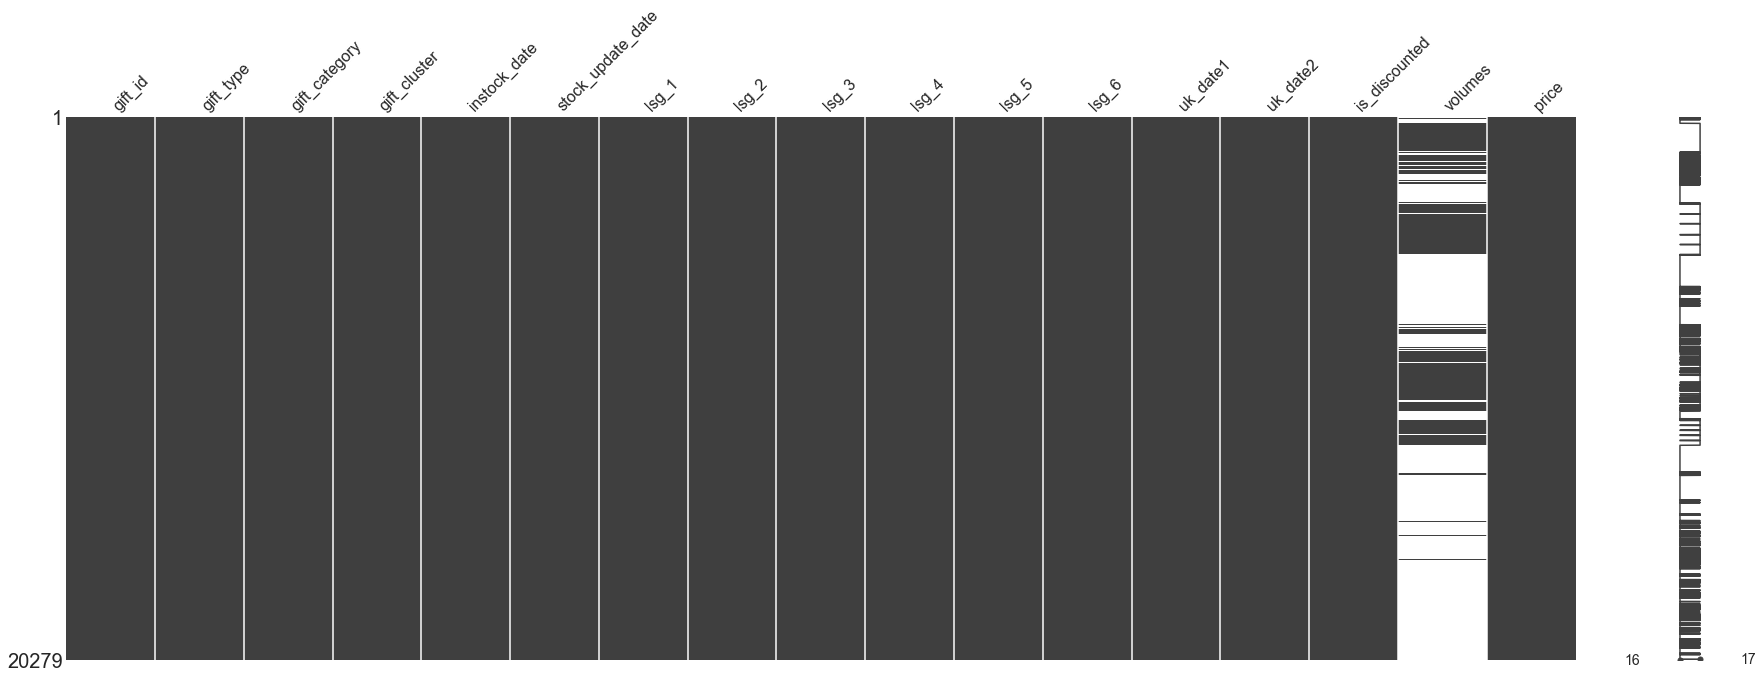

In [71]:
# Plot graphic of missing values for train data
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here in X_12 cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [72]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

gift_id                  0
gift_type                0
gift_category            0
gift_cluster             0
instock_date             0
stock_update_date        0
lsg_1                    0
lsg_2                    0
lsg_3                    0
lsg_4                    0
lsg_5                    0
lsg_6                    0
uk_date1                 0
uk_date2                 0
is_discounted            0
volumes              12956
price                    0
dtype: int64

In [73]:
total_train = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_2], axis=1, keys=['Total', '%'])
missing_data_train.head(5)

,Total,%
volumes,12956,63.9
price,0,0.0
lsg_2,0,0.0
gift_type,0,0.0
gift_category,0,0.0


Similarly i checked for missing data in test data

In [74]:
test.isnull().sum()

gift_id                 0
gift_type               0
gift_category           0
gift_cluster            0
instock_date            0
stock_update_date       0
lsg_1                   0
lsg_2                   0
lsg_3                   0
lsg_4                   0
lsg_5                   0
lsg_6                   0
uk_date1                0
uk_date2                0
is_discounted           0
volumes              2352
dtype: int64

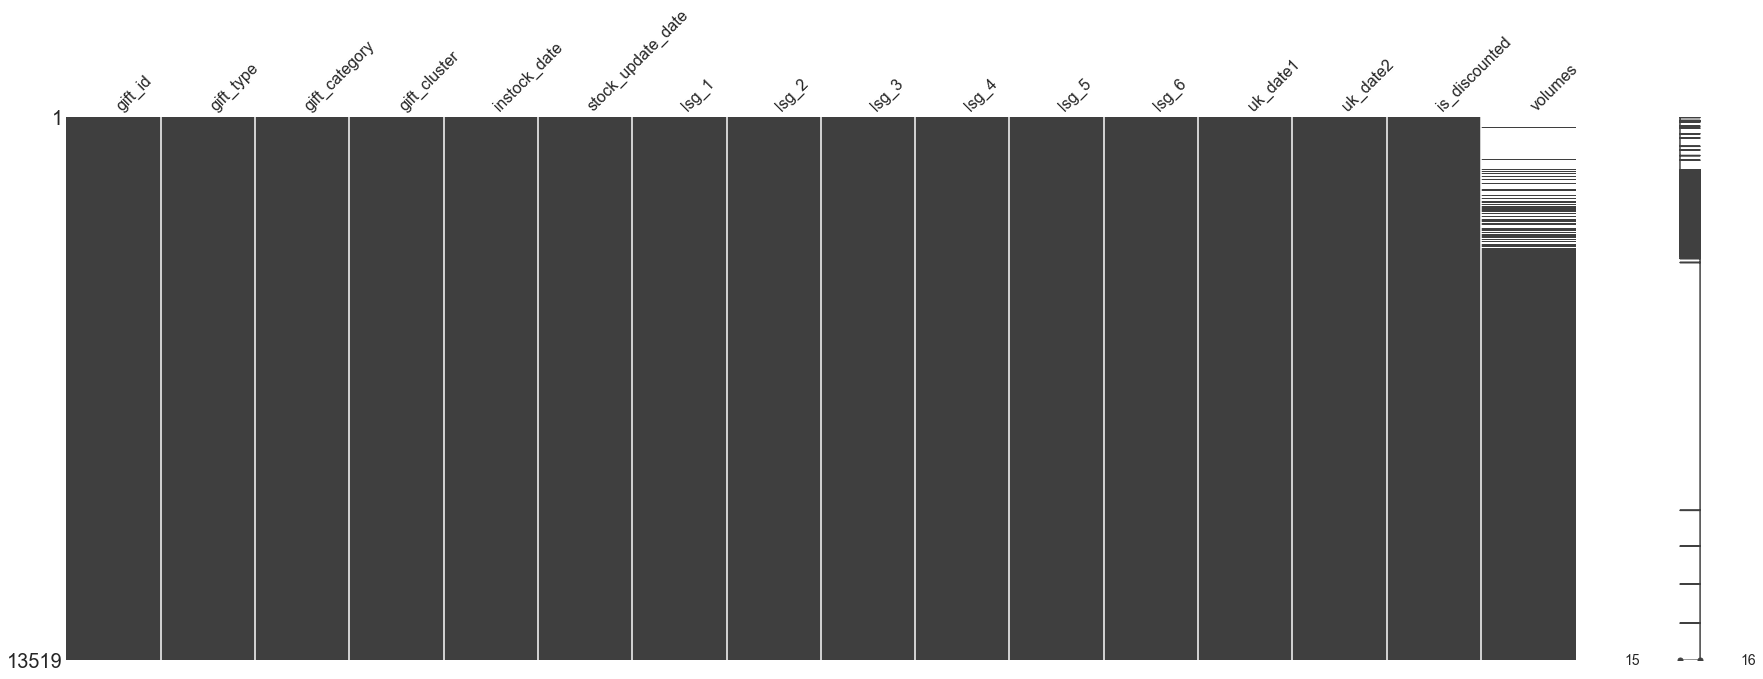

In [75]:
# Plot graphic of missing values
missingno.matrix(test, figsize = (30,10))

## Data Description

**gift_id:** 	Unique ID of gift

**gift_type:** 	Type of gift (clothes/perfumes/etc.)

**gift_category:** 	Category to which the gift belongs under that gift type

**gift_cluster:** 	Type of industry the gift belongs

**instock_date:** 	Date of arrival of stock

**stock_update_date:** 	Date on which the stock was updated

**lsg_1 - lsg_6:** 	Anonymized variables related to gift

**uk_date1, uk_date2:** 	Buyer related dates

**is_discounted:** 	Shows whether the discounted is applicable on the gift

**volumes:** 	Number of packages bought

**price:**  	The total price

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [76]:
# Different data types in the dataset
train.dtypes

gift_id               object
gift_type              int64
gift_category          int64
gift_cluster           int64
instock_date          object
stock_update_date     object
lsg_1                  int64
lsg_2                  int64
lsg_3                  int64
lsg_4                  int64
lsg_5                  int64
lsg_6                  int64
uk_date1              object
uk_date2              object
is_discounted          int64
volumes              float64
price                float64
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

### Predicting the missing values of volume column in train dataset

In [77]:
train.volumes.value_counts()

10.0    730
9.0     705
8.0     601
7.0     542
6.0     413
25.0    410
27.0    383
26.0    366
11.0    358
28.0    299
24.0    282
12.0    236
19.0    209
18.0    208
15.0    194
17.0    184
16.0    180
13.0    168
22.0    147
20.0    147
23.0    147
14.0    139
29.0    134
21.0    123
5.0      18
Name: volumes, dtype: int64

In [78]:
features_tr = ['price','gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']
target_tr = 'volumes'

In [79]:
# Slicing the Data Frame to create Model
m_tr = train[['volumes', 'price', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']]
d_tr = m_tr.dropna()

In [80]:
X_tr = d_tr.drop('volumes',axis=1)
Y_tr = d_tr['volumes']

In [81]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor


In [82]:
# Splitting the Data
Xtr_train, Xtr_test, Ytr_train, Ytr_test = train_test_split(X_tr, Y_tr, test_size = 0.3, random_state = 0)

# Creating the Model (Optimised)
model_tr = GradientBoostingRegressor(n_estimators = 120 , random_state = 2 , learning_rate = 0.378 , max_depth = 5)
model_tr.fit(Xtr_train,Ytr_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.378, loss='ls',
                          max_depth=5, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
y_pred_tr = np.round(model_tr.predict(Xtr_test),0)

In [84]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Ytr_test, y_pred_tr))
print('Mean Squared Error:', metrics.mean_squared_error(Ytr_test, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytr_test, y_pred_tr)))

Mean Absolute Error: 1.5566681838871188
Mean Squared Error: 4.105598543468366
Root Mean Squared Error: 2.026227663286721


In [85]:
df_tr = pd.DataFrame({'Actual': Ytr_test, 'Predicted': y_pred_tr})
df_tr

,Actual,Predicted
3586,29.0,28.0
12206,11.0,13.0
10471,26.0,27.0
2036,6.0,7.0
10951,27.0,26.0
...,...,...
4984,6.0,9.0
1483,27.0,28.0
288,7.0,8.0
10723,15.0,16.0


Since the rmse is 2% , we can now use the model to pridict the null values in the volume column

In [86]:
df_train_vol = train.copy()
test_vol_tr  = pd.DataFrame(df_train_vol[df_train_vol['volumes'].isnull()])
df_train_vol.dropna(inplace=True)

In [87]:
Xtr_train.columns

Index(['price', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2',
       'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted'],
      dtype='object')

In [88]:
test_vol_tr[features_tr].columns

Index(['price', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2',
       'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted'],
      dtype='object')

In [89]:
# Predicting Null Values in the 'Volumes' Column
predictions_tr = model_tr.predict(test_vol_tr[features_tr])

predictions_tr.shape

(12956,)

In [90]:
# Imputing Predicted Null Values in the Dataset
test_vol_tr[target] = predictions_tr
frame = [df_train_vol, test_vol_tr]

In [91]:
final_tr = pd.concat(frame)

In [92]:
final_tr.shape

(20279, 17)

### Predicting the values of volumn column in test data set

In [93]:
test.volumes.value_counts()

10.0    1063
9.0     1031
8.0      935
7.0      725
11.0     636
25.0     585
24.0     582
27.0     541
6.0      532
26.0     531
12.0     525
28.0     484
13.0     345
15.0     325
14.0     322
16.0     295
23.0     289
17.0     256
20.0     226
22.0     221
21.0     214
18.0     209
19.0     186
29.0      75
5.0       34
Name: volumes, dtype: int64

In [94]:
features_te = ['gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']
target_te = 'volumes'

In [95]:
# Slicing the Data Frame to create Model
m_te = test[['volumes','gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']]
d_te = m_te.dropna()

In [96]:
X_te = d_te.drop('volumes',axis=1)
Y_te = d_te['volumes']

In [97]:
X_te.shape

(11167, 10)

In [98]:
# Splitting the Data
Xte_train, Xte_test, Yte_train, Yte_test = train_test_split(X_te, Y_te, test_size = 0.3, random_state = 0)

# Creating the Model (Optimised)
model_te = GradientBoostingRegressor(n_estimators = 120 , random_state = 2 , learning_rate = 0.378 , max_depth = 5)
model_te.fit(Xte_train,Yte_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.378, loss='ls',
                          max_depth=5, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
y_pred_te = np.round(model_te.predict(Xte_test),0)

In [100]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Yte_test, y_pred_te))
print('Mean Squared Error:', metrics.mean_squared_error(Yte_test, y_pred_te))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Yte_test, y_pred_te)))

Mean Absolute Error: 1.5947478364667262
Mean Squared Error: 4.833184124142047
Root Mean Squared Error: 2.198450391558119


In [101]:
df_te = pd.DataFrame({'Actual': Yte_test, 'Predicted': y_pred_te})
df_te

,Actual,Predicted
11501,24.0,23.0
4093,6.0,8.0
13409,11.0,11.0
11611,28.0,27.0
12315,15.0,17.0
...,...,...
10507,22.0,20.0
6335,12.0,14.0
5006,24.0,25.0
12074,23.0,22.0


Since the rmse is 2% , we can now use the model to pridict the null values in the volume column

In [102]:
df_test_vol = test.copy()
test_vol_te  = pd.DataFrame(df_test_vol[df_test_vol['volumes'].isnull()])
df_test_vol.dropna(inplace=True)

In [103]:
Xte_train.columns

Index(['gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3',
       'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted'],
      dtype='object')

In [104]:
test_vol_te[features_te].columns

Index(['gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3',
       'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted'],
      dtype='object')

In [105]:
# Predicting Null Values in the 'Volumes' Column
predictions_te = model_te.predict(test_vol_te[features_te])

predictions_te.shape

(2352,)

In [106]:
# Imputing Predicted Null Values in the Dataset
test_vol_te[target] = predictions_te
frame_te = [df_test_vol, test_vol_te]

In [107]:
final_te = pd.concat(frame_te)

In [108]:
final_te.shape

(13519, 16)

## To perform our data analysis, let's create two new dataframes which are a copy of original dataset

In [109]:
print("train",train.shape)
print("final_tr",final_tr.shape)

train (20279, 17)
final_tr (20279, 17)


In [110]:
print("test",test.shape)
print("final_te",final_te.shape)

test (13519, 16)
final_te (13519, 16)


In [111]:
df_train = final_tr.copy()

In [112]:
df_test= final_te.copy()

In [113]:
df_train.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'volumes', 'price'],
      dtype='object')

In [114]:
df_test.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'volumes'],
      dtype='object')

In [115]:
df_train = df_train.drop(['gift_id','instock_date','stock_update_date','uk_date1','uk_date2'],axis=1)
df_test = df_test.drop(['gift_id','instock_date','stock_update_date','uk_date1','uk_date2'],axis=1)

In [116]:
df_train.shape

(20279, 12)

In [117]:
df_train.isnull().sum()

gift_type        0
gift_category    0
gift_cluster     0
lsg_1            0
lsg_2            0
lsg_3            0
lsg_4            0
lsg_5            0
lsg_6            0
is_discounted    0
volumes          0
price            0
dtype: int64

In [118]:
df_train.dtypes

gift_type          int64
gift_category      int64
gift_cluster       int64
lsg_1              int64
lsg_2              int64
lsg_3              int64
lsg_4              int64
lsg_5              int64
lsg_6              int64
is_discounted      int64
volumes          float64
price            float64
dtype: object

In [119]:
df_test.shape

(13519, 11)

In [120]:
df_test.isnull().sum()

gift_type        0
gift_category    0
gift_cluster     0
lsg_1            0
lsg_2            0
lsg_3            0
lsg_4            0
lsg_5            0
lsg_6            0
is_discounted    0
volumes          0
dtype: int64

In [121]:
df_test.dtypes

gift_type          int64
gift_category      int64
gift_cluster       int64
lsg_1              int64
lsg_2              int64
lsg_3              int64
lsg_4              int64
lsg_5              int64
lsg_6              int64
is_discounted      int64
volumes          float64
dtype: object

In [143]:
df_train['lsg_4'] = (df_train['lsg_4'] - df_train['lsg_4'].mean()) / df_train['lsg_4'].std()
df_train['lsg_4'] = np.c_[np.ones(df_train['lsg_4'].shape[0]), df_train['lsg_4']] 

## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's seperate the data

In [145]:
# Split the dataframe into data and labels
X_train = df_train.drop('price', axis=1) # data
y_train = df_train.price # labels
X_test = df_test

In [146]:
# Shape of the data (without labels)
X_train.shape

(20279, 11)

In [147]:
# Shape of the labels
y_train.shape

(20279,)

In [148]:
# Shape of the test data
X_test.shape

(13519, 11)

In [149]:
X_train.head()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes
12,168,403,1846,3799,3358,1230,1.0,9,327,0,25.0
13,168,403,1846,3799,3358,1230,1.0,9,327,0,26.0
14,168,403,1846,3799,3358,1230,1.0,9,327,0,26.0
15,168,403,1846,3799,3358,1230,1.0,9,327,0,29.0
16,168,403,1846,3799,3358,1230,1.0,9,327,0,25.0


In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

### Building the Pipeline

The first step in building the pipeline is to define each transformer type. The convention here is generally to create transformers for the different variable types. In the code below I have created a numeric transformer which applies a StandardScaler, and includes a SimpleImputer to fill in any missing values.

We are building a basic pipeline with two steps,

* Normalize numerical features with StandardScaler()
* Run the Regressor


Trying out the following classification algorithms

* Linear Regression
* Lasso
* Ridge
* K-nearest Regressor
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* SVR

In [151]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',Ridge())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -52140.727594 (60534.722991)
ScaledLASSO: -52300.021694 (61374.444830)
ScaledRIDGE: -52140.668212 (60536.504615)
ScaledKNN: -27141.378316 (25846.014502)
ScaledDT: -70480.743114 (91620.440980)
ScaledGBM: -25430.398668 (30774.024480)
ScaledRF: -33212.847667 (45282.841672)
ScaledSVR: -57239.004607 (90131.605100)


In [132]:
# from sklearn.model_selection import GridSearchCV

# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# param_grid = { 
#             "n_estimators"      : [100,200,300],
#             "max_features"      : ["auto", "sqrt", "log2"],
#             "min_samples_split" : [2,4,8],
#             "bootstrap": [True, False],
#             }
# model =RandomForestRegressor()
# kfold =KFold(n_splits=10, random_state=21,shuffle=True)
# grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, scoring='neg_mean_squared_error', cv=kfold)
# grid_result = grid.fit(rescaledX, y_train)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-11378.231156 (6610.229692) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
-11107.911354 (6871.695184) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}
-11070.479589 (6823.931898) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}
-11757.570308 (7119.679077) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}
-11653.465471 (6727.917089) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200}
-11930.677601 (6915.074954) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 300}
-13565.979936 (7968.260410) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
-13516.233285 (7978.677185) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 200}
-13568.782634 (7

In [152]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = { 
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            }
model =GradientBoostingRegressor()
kfold =KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-25458.748133 (31046.183769) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
-24236.390062 (28788.404719) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}
-23405.980574 (26849.218517) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}
-25489.603922 (30921.921842) with: {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}
-24236.417553 (29019.962891) with: {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200}
-23511.727942 (26717.723903) with: {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 300}
-25663.231729 (31367.201674) with: {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
-23855.628604 (28604.060581) with: {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 200}
-23260.898063 (27684.139346) with: {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 300}
-25777.591492 (30790.730797) with: {'max_features': 'sq

In [139]:
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

fin_model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

fin_model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = fin_model.predict(rescaled_X_test)

In [154]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['gift_id']=test['gift_id']
submission['price'] = predictions # our model predictions on the test dataset
submission.head()

,gift_id,price
0,GF_2372,141.334153
1,GF_13040,100.121828
2,GF_5754,139.054503
3,GF_1417,83.203672
4,GF_23204,141.334153


In [155]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
submission.to_csv('../gb1_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


## Feature Importance

Which features of the best model were most important for making predictions?

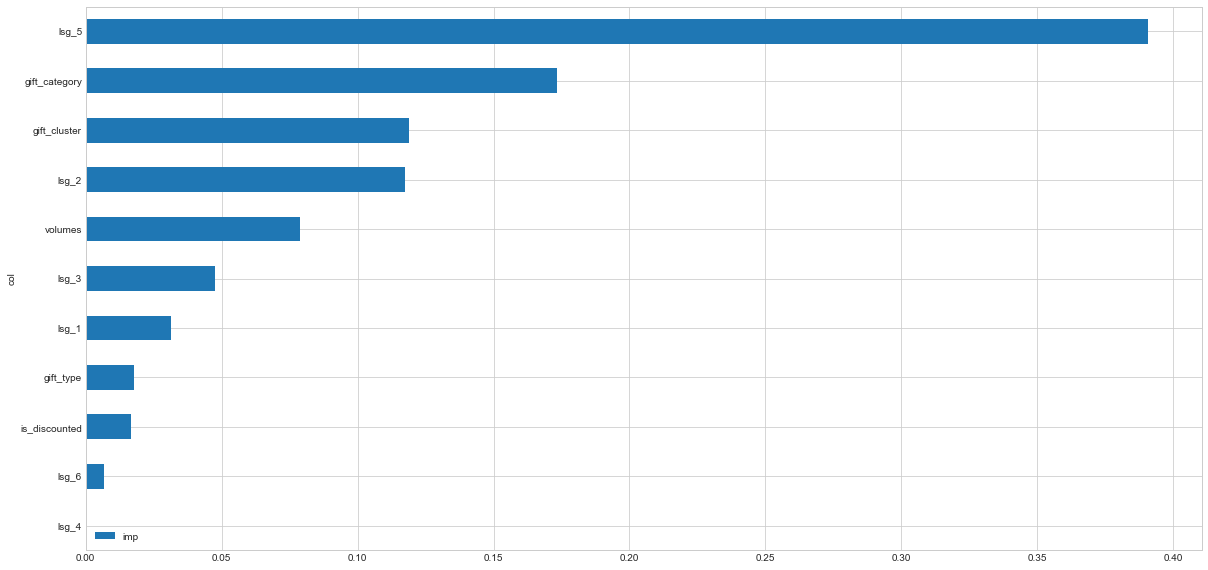

In [156]:
#Feature Importance
def feature_importance(model, data):
    
    fea_imp = pd.DataFrame({'imp': fin_model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True,False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

# Plot the feature importance scores
feature_importances = feature_importance(model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

In [157]:
feature_importances = feature_importances.sort_values(['imp'],ascending=False)

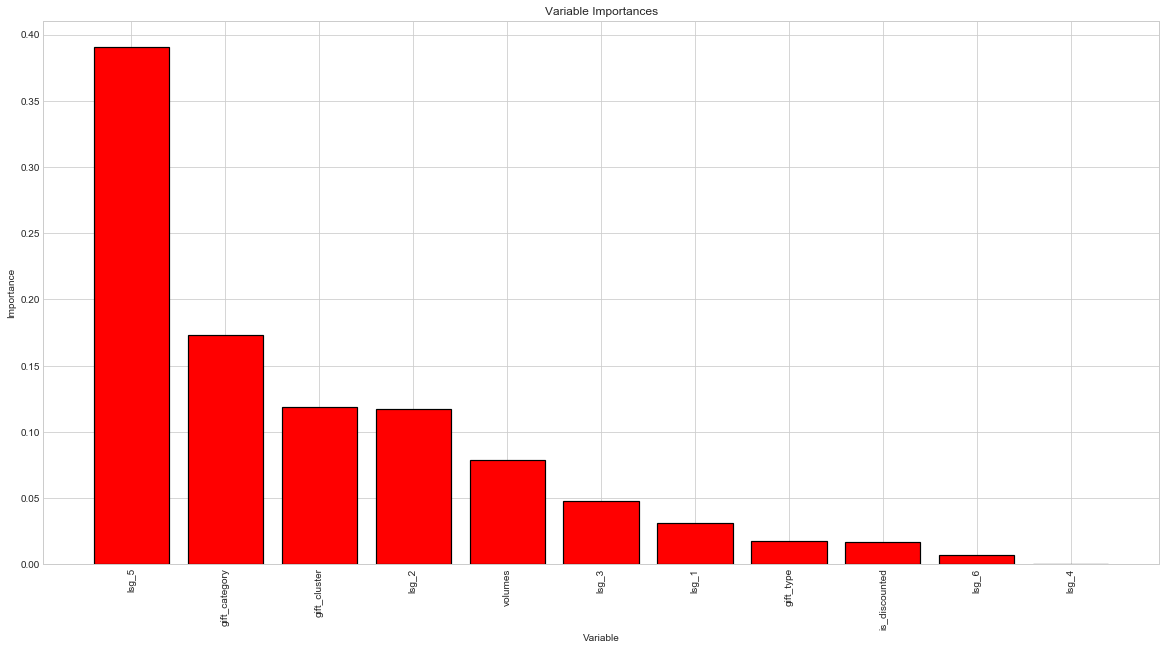

In [158]:
# list of x locations for plotting
x_values = list(range(len(feature_importances.imp)))# Make a bar chart
fig = plt.figure(figsize=(20,10))
plt.bar(x_values, feature_importances.imp, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)# Tick labels for x axis
plt.xticks(x_values, feature_importances.col, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Making a cumulative importance graph that shows the contribution to the overall importance of each additional variable. The dashed line is drawn at 90% of total importance accounted for.

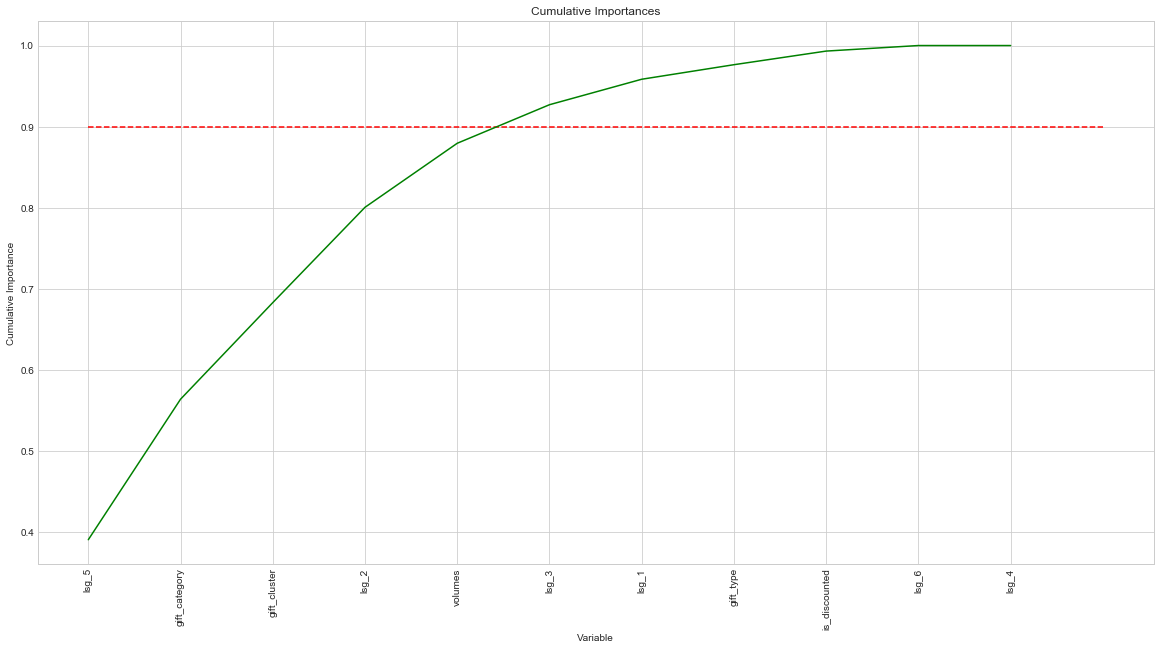

In [160]:
# List of features sorted from most to least important

sorted_importances = [importance for importance in feature_importances.imp]

sorted_features = [importance for importance in feature_importances.col]# Cumulative importances


cumulative_importances = np.cumsum(sorted_importances)# Make a line graph
fig = plt.figure(figsize=(20,10))
plt.plot(x_values, cumulative_importances, 'g-')# Draw line at 90% of importance retained

plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')# Format x ticks and labels

plt.xticks(x_values, sorted_features, rotation = 'vertical')# Axis labels and title

plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

We now use this to remove unimportant features. 90% is an arbitrary threshold, but if it leads to noticeably poor performance we can adjust the value. First, we need to find the exact number of features to exceed 90% importance:

In [161]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 6


In [162]:
# Extract the names of the most important features
important_feature_names = [feature for feature in feature_importances.col[:6]]


important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (20279, 6)
Important test features shape: (13519, 6)


In [163]:
# Train the expanded model on only the important features
fin_model.fit(important_train_features, y_train)
# Make predictions on test data
final_predictions = fin_model.predict(important_test_features)

In [164]:
# Create a submisison dataframe and append the relevant columns
final_submission = pd.DataFrame()
final_submission['gift_id']=test['gift_id']
final_submission['price'] = predictions # our model predictions on the test dataset
final_submission.head()

,gift_id,price
0,GF_2372,141.334153
1,GF_13040,100.121828
2,GF_5754,139.054503
3,GF_1417,83.203672
4,GF_23204,141.334153


In [165]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
final_submission.to_csv('../final_gb_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
